<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this jupyter notebook, we use xgboost to try to produce a binary classifier for whether or not a player is max level (deserves a max contract)

In [206]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
complete = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/complete22-23.csv')

In [208]:
#use a lambda function to assign classes
complete['Class'] = complete['Salary'].apply(lambda x: 1 if x > 25 else 0)

In [209]:
#the count of each class in the dataset before splitting
complete['Class'].value_counts()

0    398
1     52
Name: Class, dtype: int64

In [210]:
#split into input features and target variable class
X = complete.drop(columns = ['Salary'], axis = 1)
y = complete['Class']

In [211]:
from sklearn.model_selection import train_test_split, cross_val_score

# Utilize a 70-30 train test split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.3, shuffle = True)

In [213]:
#list of players in the test set
#Ben Simmons and Russell Westbrook are in our set which is great (these are two of the 
#outliers-worst max contracts)
print(list(X_test['Player']))

['Donovan Mitchell', 'Khem Birch', 'Kevin Porter Jr.', 'Naji Marshall', 'Luke Kennard', 'R.J. Hampton', 'Isaiah Jackson', 'Justin Holiday', 'Jaden Ivey', 'Jarred Vanderbilt', 'Kennedy Chandler', 'Kevon Harris', 'Shaedon Sharpe', 'Jevon Carter', 'Ricky Rubio', 'Kyle Kuzma', 'Jeff Dowtin', 'Derrick Rose', 'Richaun Holmes', 'Bradley Beal', 'McKinley Wright IV', 'Jabari Walker', 'Aaron Holiday', 'Paul George', 'Mikal Bridges', 'Moussa Diabaté', 'Bogdan Bogdanović', 'Justise Winslow', 'Blake Griffin', 'Dejounte Murray', 'Javonte Green', 'Alperen Şengün', 'Bruno Fernando', 'Josh Okogie', 'Ivica Zubac', 'Malaki Branham', 'Tim Hardaway Jr.', 'Lamar Stevens', 'Mo Bamba', 'Derrick Jones Jr.', 'Wenyen Gabriel', 'Markieff Morris', 'Russell Westbrook', 'Tre Mann', 'Shai Gilgeous-Alexander', 'Kevin Knox', 'Tyrese Maxey', 'Frank Ntilikina', 'Trey Murphy III', 'Duane Washington Jr.', 'Killian Hayes', 'Bruce Brown', 'T.J. Warren', 'John Butler', 'Al Horford', 'Mike Muscala', 'Matisse Thybulle', 'Cory J

In [214]:
for index, rows in X_train.iterrows():
  if X_train.at[index, 'Class'] == 1:
    print(X_train.at[index, 'Player'])

Giannis Antetokounmpo
Brandon Ingram
Anthony Davis
Devin Booker
Jaylen Brown
Andrew Wiggins
Myles Turner
Jalen Brunson
James Harden
Jaren Jackson Jr.
Bam Adebayo
Nikola Jokić
Damian Lillard
Trae Young
DeMar DeRozan
Khris Middleton
John Wall
Kyrie Irving
Pascal Siakam
De'Aaron Fox
Rudy Gobert
LeBron James
Joel Embiid
CJ McCollum
Kristaps Porziņģis
Tobias Harris
Kawhi Leonard
Zach LaVine
Chris Paul
Gordon Hayward
Deandre Ayton
Jrue Holiday
Luka Dončić
D'Angelo Russell
Kyle Lowry
Jimmy Butler
Karl-Anthony Towns


In [215]:
#drop the names column before proceeding
names_train = list(X_train['Player'])
X_train.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)

names_test = list(X_test['Player'])
X_test.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)

In [216]:
print('Train:')
print('train_features dimensions: ', X_train.shape)
print('train_target dimensions: ', y_train.shape, '\n')


print('Test:')
print('test_features dimensions: ', X_test.shape)
print('test_target dimensions: ', y_test.shape)

Train:
train_features dimensions:  (315, 60)
train_target dimensions:  (315,) 

Test:
test_features dimensions:  (135, 60)
test_target dimensions:  (135,)


In [217]:
from sklearn.feature_selection import SelectKBest, f_classif
top_features_ordered = []

#numerical input, categorical output -> use ANOVA
best_features = SelectKBest(f_classif, k=15)
k_best_data = best_features.fit_transform(X_train, y_train)
mask = best_features.get_support()
new_features = X_train.columns[mask]

new_features

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Index(['FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'TOV', 'PTS', 'VORP', 'WS_per_G',
       'OWS_per_G', 'TS_times_USG', 'PTs_per_36', 'two_way', 'Class'],
      dtype='object')

In [218]:
selected = ['WS_per_G', 'TS_times_USG', 'PTs_per_36', 'two_way', 'VORP', 'FT', 'TOV', 'OBPM', 'PF_per_dplay']

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train[selected], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [219]:
y_pred = xgb_classifier.predict(X_test[selected])

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("accuracy: ", accuracy_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

accuracy:  0.9259259259259259
F1:  0.6153846153846153
Precision:  0.7272727272727273
Recall:  0.5333333333333333


[[117   3]
 [  7   8]]


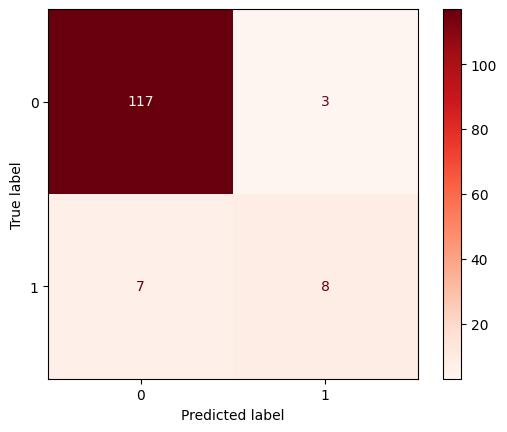

In [221]:
disp = ConfusionMatrixDisplay.from_estimator(
        xgb_classifier,
        X_test[selected],
        y_test,
        cmap=plt.cm.Reds,
    )

print(disp.confusion_matrix)
     

In [222]:
predictions = pd.DataFrame({'Name': names_test, 'Real label': y_test, 'Prediction': y_pred})

In [223]:
misclassified = predictions.loc[predictions['Real label'] != predictions['Prediction']].reset_index(drop = True)
misclassified

,Name,Real label,Prediction
0,Russell Westbrook,1,0
1,Al Horford,1,0
2,Zion Williamson,0,1
3,Lauri Markkanen,0,1
4,Victor Oladipo,0,1
5,Ben Simmons,1,0
6,Kevin Love,1,0
7,Michael Porter Jr.,1,0
8,Klay Thompson,1,0
9,Draymond Green,1,0
